In [14]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
import statsmodels.formula.api as sm

In [2]:
base = pd.read_csv('../dados/mt_cars.csv')
base = base.drop(['Unnamed: 0'], axis = 1)

In [3]:
X = base.iloc[:, 2].values
Y = base.iloc[:, 0].values

In [4]:
correlacao = np.corrcoef(X,Y)
correlacao

array([[ 1.        , -0.84755138],
       [-0.84755138,  1.        ]])

In [5]:
X = X.reshape(-1,1)

In [6]:
modelo = LinearRegression()
modelo.fit(X,Y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [7]:
print(modelo.intercept_)
print(modelo.coef_)

29.59985475616395
[-0.04121512]


In [8]:
#coeficiente de determinação
modelo.score(X,Y)

0.7183433404897299

In [17]:
#coeficiente de determinação ajustado
previsoes = modelo.predict(X)
modelo_ajustado = sm.ols(formula = 'mpg ~ disp', data = base)
modelo_treinado = modelo_ajustado.fit()
modelo_treinado.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    mpg   R-squared:                       0.718
Model:                            OLS   Adj. R-squared:                  0.709
Method:                 Least Squares   F-statistic:                     76.51
Date:                Wed, 26 Dec 2018   Prob (F-statistic):           9.38e-10
Time:                        12:42:34   Log-Likelihood:                -82.105
No. Observations:                  32   AIC:                             168.2
Df Residuals:                      30   BIC:                             171.1
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     29.5999      1.230     24.070      0.000      27.088      32.111
disp          -0.0412      0.005     -8.747      0.000      -0.051      -0.032
==============================================================================
Omnibus:                        3.368   Durbin-Watson:                   1.250
Prob(Omnibus):                  0.186   Jarque-Bera (JB):                3.049
Skew:                           0.719   Prob(JB):                        0.218
Kurtosis:                       2.532   Cond. No.                         558.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

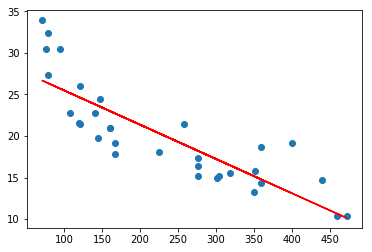

In [18]:
plt.scatter(X,Y)
plt.plot(X, previsoes, color='red')

In [ ]:
#200 polegadas cúbicas => 21,36 galões por milhas
modelo.predict(200)

In [23]:
#regressão múltipla
X1 = base.iloc[:, 1:4].values
Y1 = base.iloc[:, 0].values

In [24]:
modelo2 = LinearRegression()
modelo2.fit(X1,Y1)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [25]:
modelo2.score(X1,Y1)

0.7678877440928638

In [26]:
modelo_ajustado2 = sm.ols(formula = 'mpg ~ disp + hp + cyl', data = base)
modelo_treinado2 = modelo_ajustado2.fit()
modelo_treinado2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    mpg   R-squared:                       0.768
Model:                            OLS   Adj. R-squared:                  0.743
Method:                 Least Squares   F-statistic:                     30.88
Date:                Wed, 26 Dec 2018   Prob (F-statistic):           5.05e-09
Time:                        12:51:28   Log-Likelihood:                -79.009
No. Observations:                  32   AIC:                             166.0
Df Residuals:                      28   BIC:                             171.9
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     34.1849      2.591     13.195      0.000      28.878      39.492
disp          -0.0188      0.010     -1.811      0.081      -0.040       0.002
hp            -0.0147      0.015     -1.002      0.325      -0.045       0.015
cyl           -1.2274      0.797     -1.540      0.135      -2.861       0.406
==============================================================================
Omnibus:                        2.942   Durbin-Watson:                   1.606
Prob(Omnibus):                  0.230   Jarque-Bera (JB):                2.558
Skew:                           0.675   Prob(JB):                        0.278
Kurtosis:                       2.692   Cond. No.                     1.51e+03
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.51e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [27]:
novo = np.array([4, 200, 100])

In [28]:
novo = novo.reshape(1, -1)

In [29]:
modelo2.predict(novo)

array([24.03968887])